# Visualizing GMMs

In [7]:
import matplotlib

matplotlib.rcParams['font.sans-serif'] = "Times New Roman"
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams.update({'font.size': 28})

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

np.random.seed(42)

import warnings
warnings.filterwarnings("always")

def remove_ax_window(ax):
    """
        Remove all axes and tick params in pyplot.
        Input: ax object.
    """
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)  
    ax.tick_params(axis=u'both', which=u'both',length=0)

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow_probability import distributions as tfd

tf.enable_eager_execution()

alphas = [0.6, 0.3, 0.1]
means = [30, 60, 120]
sigmas = [5, 3, 1]

gm = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(probs=alphas),
    components_distribution=tfd.Normal(
        loc=means,       
        scale=sigmas))

prices = gm.sample(sample_shape=(int(1e5)), seed=42)

nd_empirical = tfd.Normal(loc=np.mean(prices), scale=np.std(prices))

print(np.mean(prices))
print(np.std(prices))

47.943787
27.797424


//anaconda/envs/TF112/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


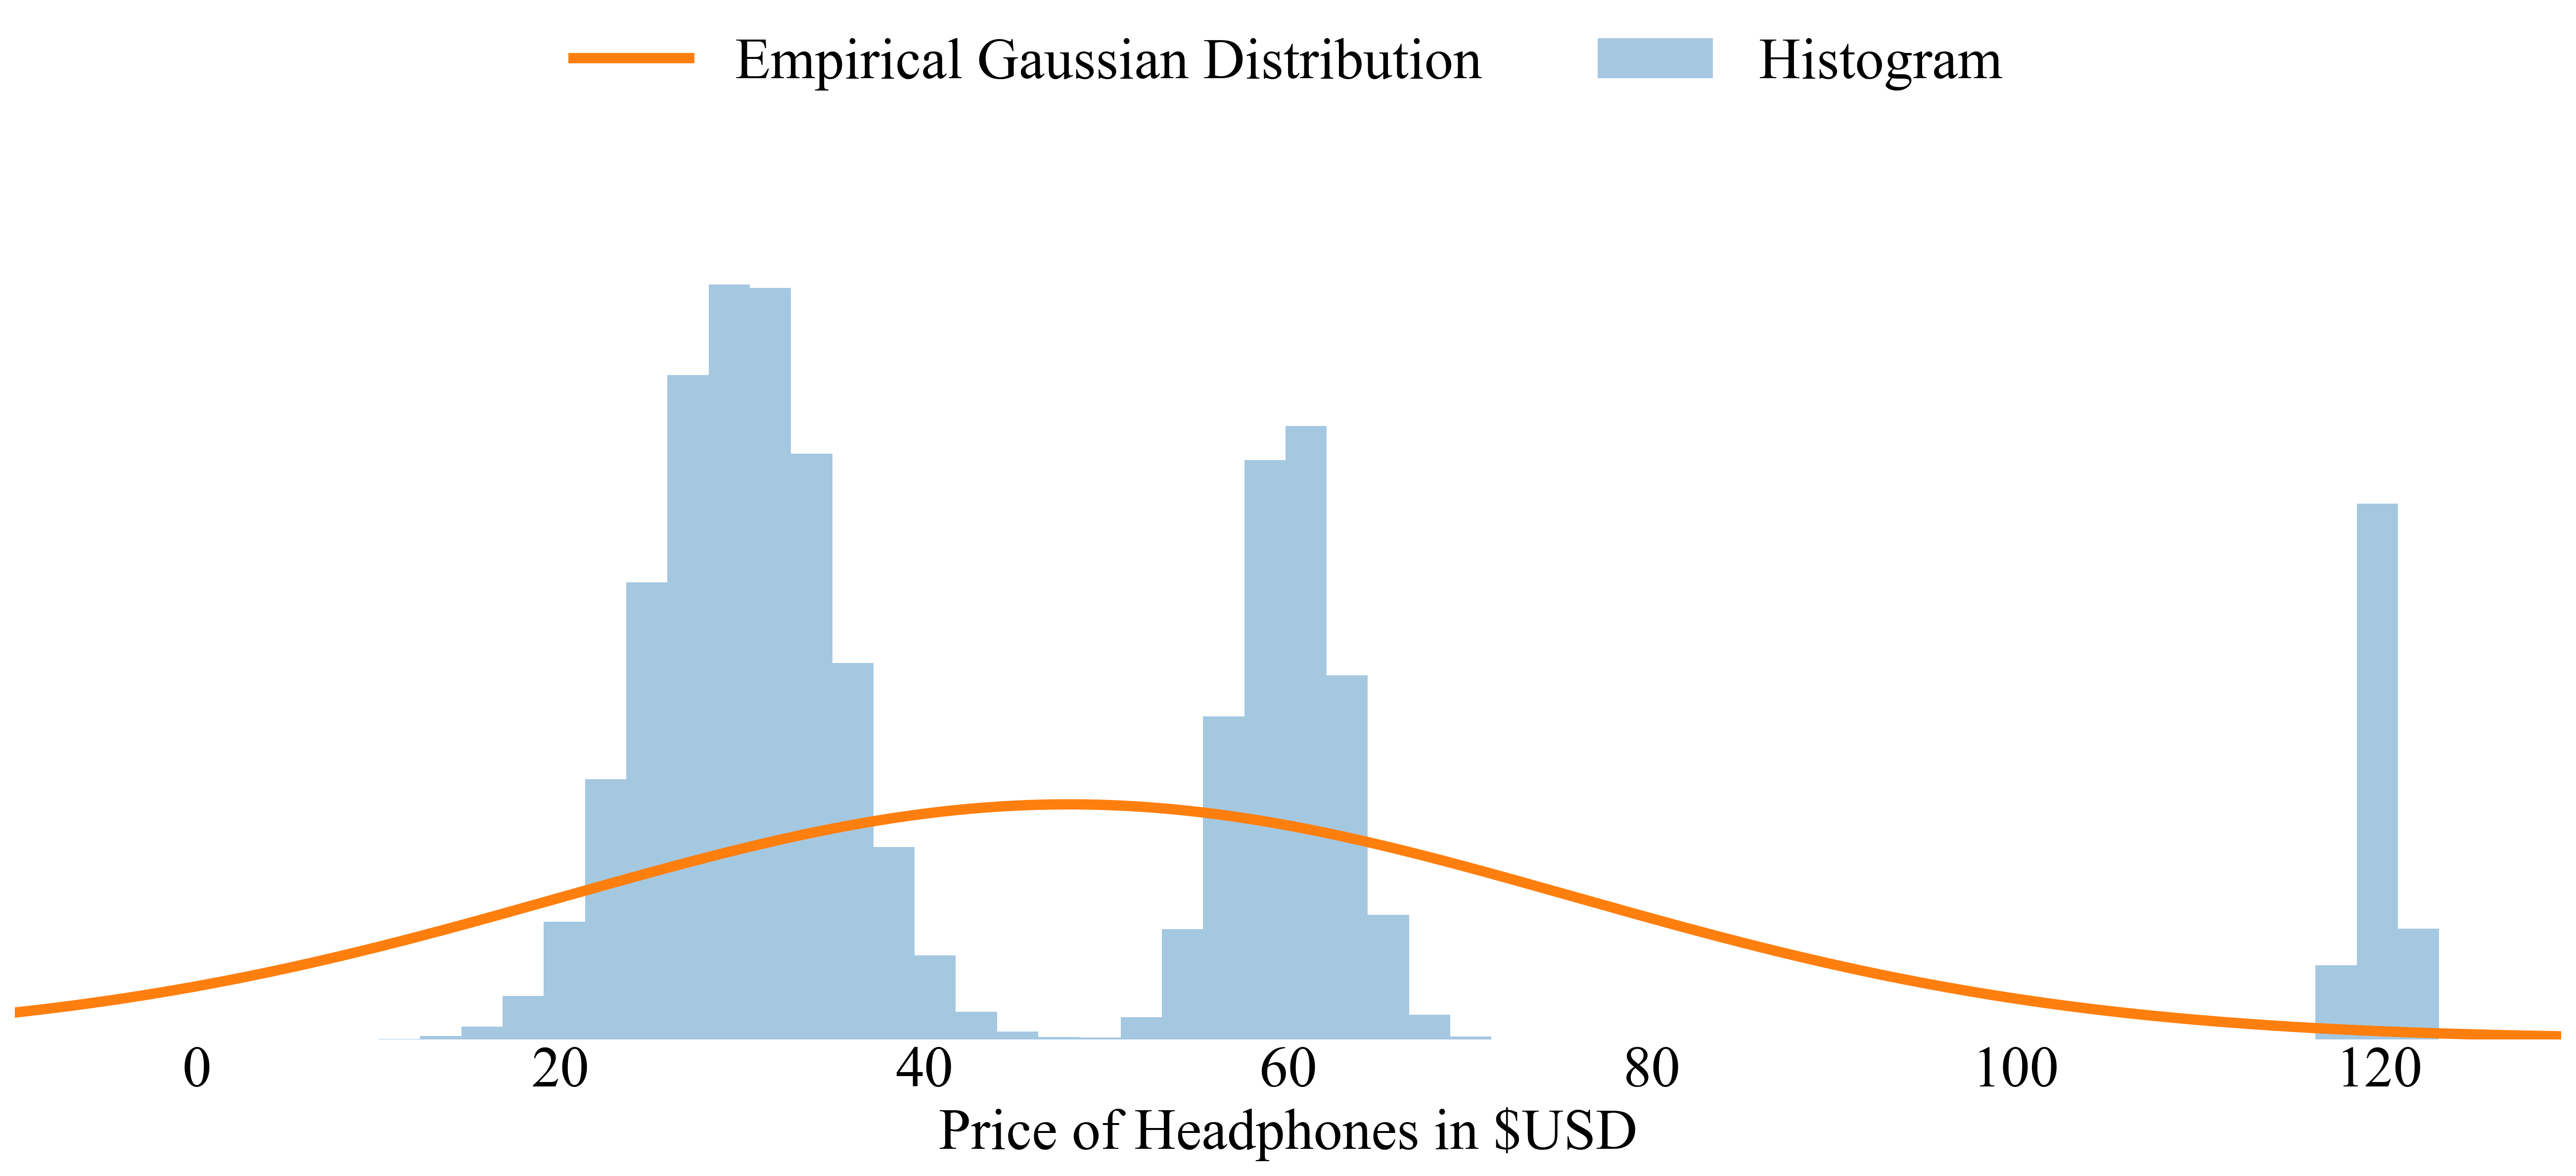

In [9]:
upper=130
lower=-10

dpi = 300
x_size = int(5600/dpi)
y_size = int(2900/dpi)


f = plt.figure(figsize=(x_size,y_size), dpi=dpi)

ax = plt.gca()
sns.distplot(prices.numpy(), bins=50, kde=False, norm_hist=True, ax=ax, label="Histogram")

ax.set_xlabel('Price of Headphones in $USD')
ax.set_xlim(lower, upper)
ax.yaxis.set_visible(False)
remove_ax_window(ax)

x = np.linspace(upper, lower, int(1e4), dtype=np.float32)
ax.plot(x, nd_empirical.prob(x).numpy(), lw=5, label="Empirical Gaussian Distribution")

ax.legend(loc=9, borderaxespad=0.1, framealpha=1.0, fancybox=True, bbox_to_anchor=(0.5, 1.3), ncol=2, shadow=True, frameon=False)
plt.tight_layout()

plt.savefig("graphics/hist.png", format='png',dpi=dpi, bbox_inches='tight')

//anaconda/envs/TF112/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


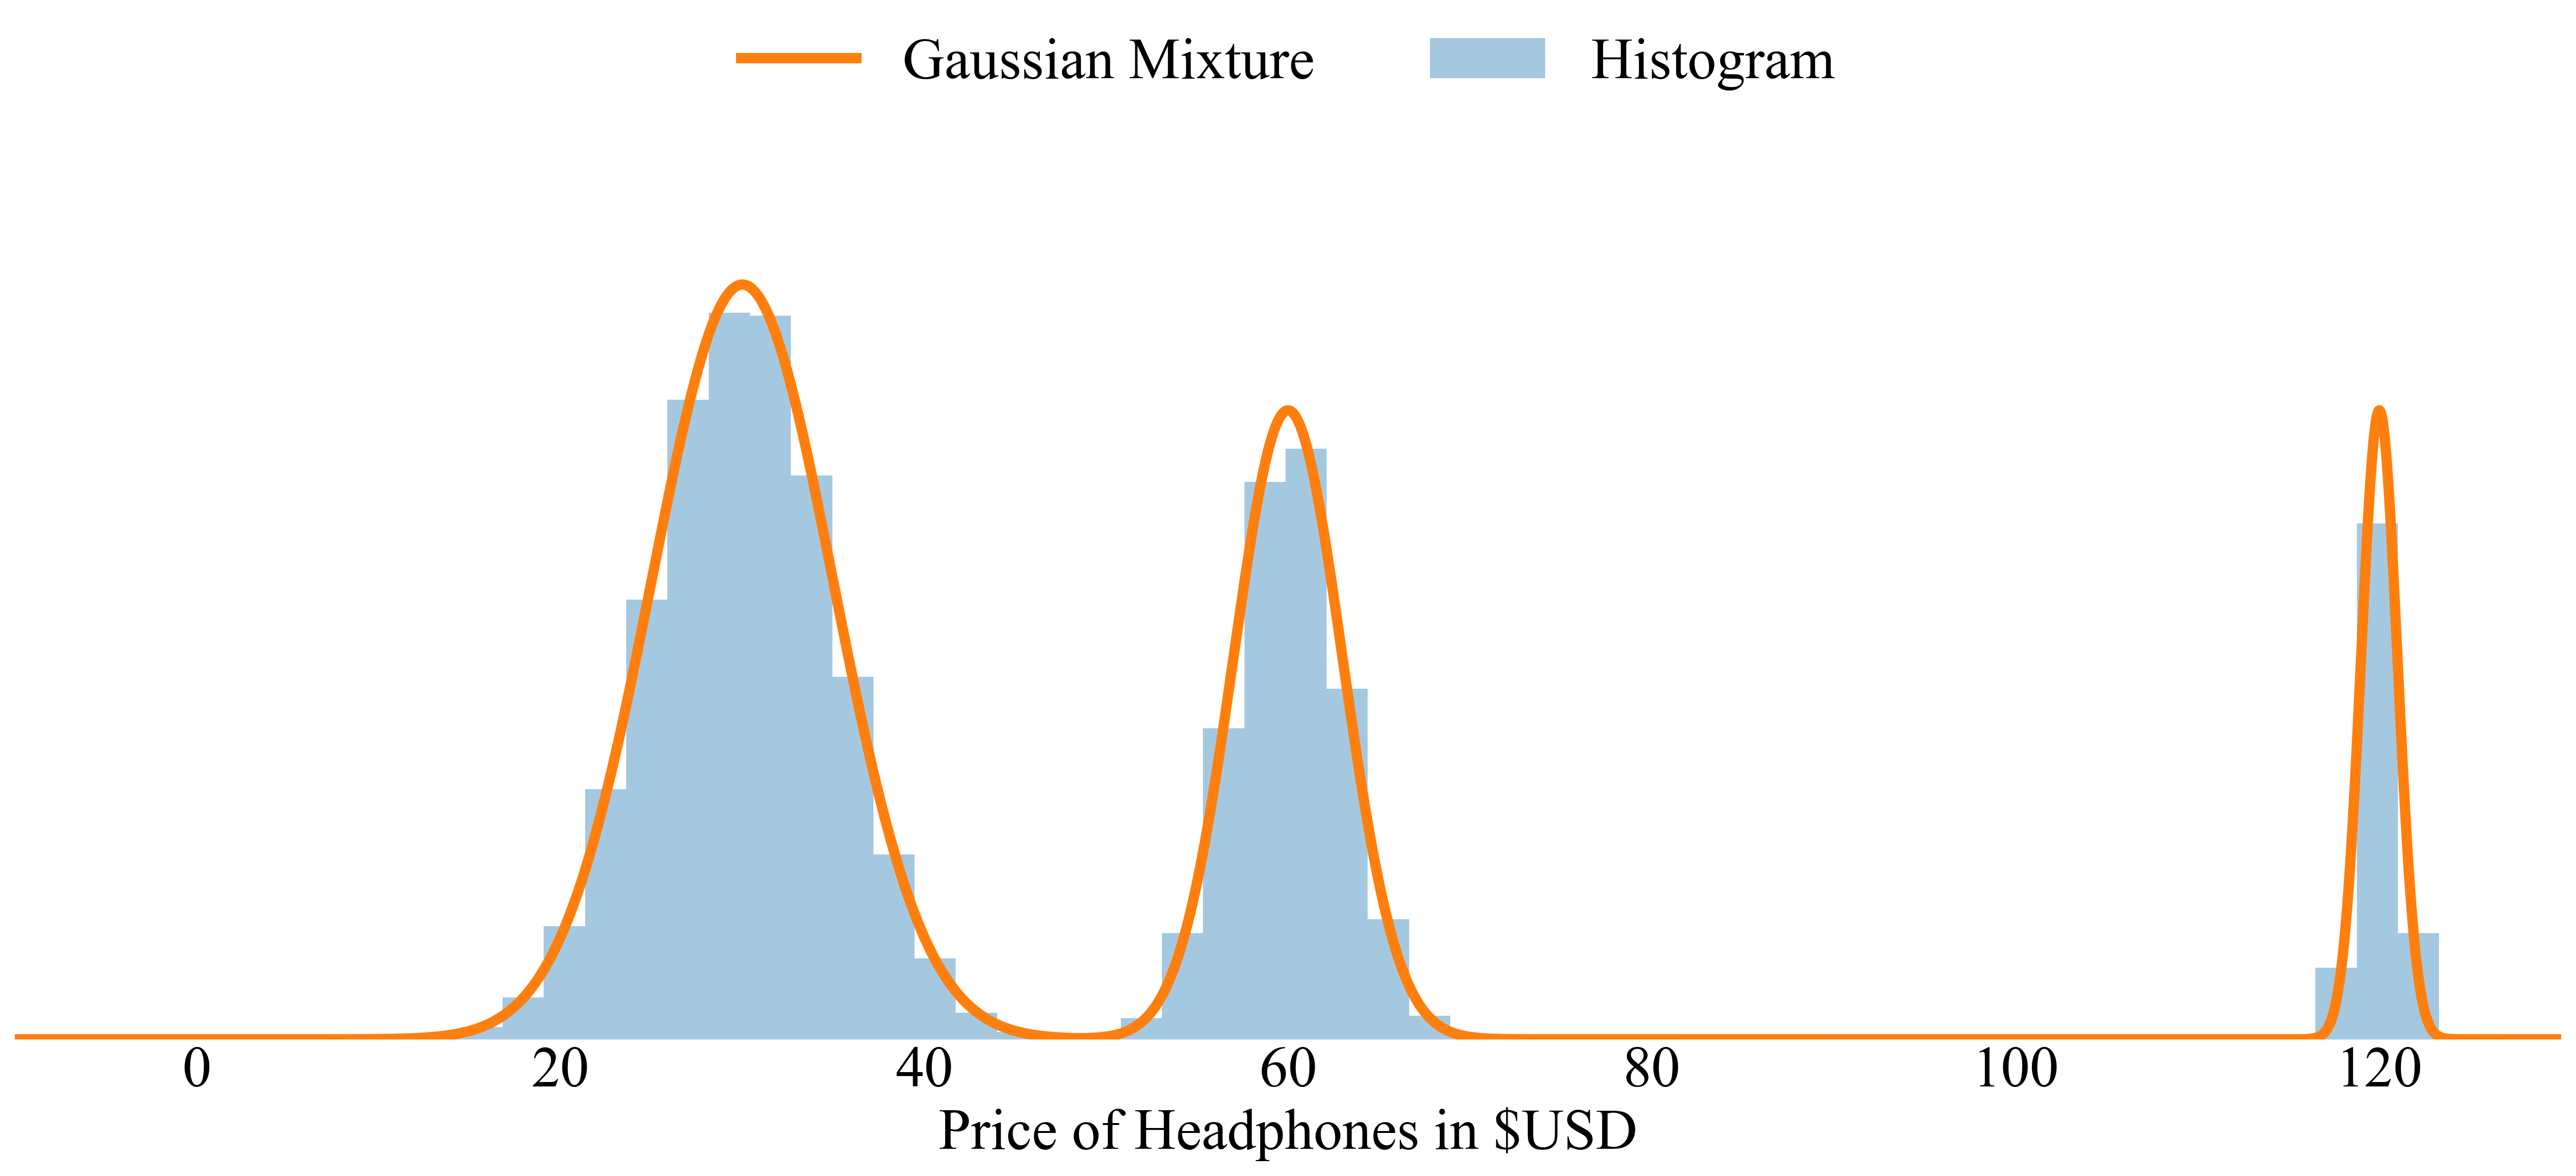

In [10]:
f = plt.figure(figsize=(x_size,y_size), dpi=dpi)

ax = plt.gca()
sns.distplot(prices.numpy(), bins=50, kde=False, norm_hist=True, ax=ax, label="Histogram")

ax.set_xlabel('Price of Headphones in $USD')
ax.set_xlim(lower, upper)
ax.yaxis.set_visible(False)
remove_ax_window(ax)

x = np.linspace(upper, lower, int(1e4), dtype=np.float32)
ax.plot(x, gm.prob(x).numpy(), lw=5, label="Gaussian Mixture")

ax.legend(loc=9, borderaxespad=0.1, framealpha=1.0, fancybox=True, bbox_to_anchor=(0.5, 1.3), ncol=2, shadow=True, frameon=False)
plt.tight_layout()

plt.savefig("graphics/mixt_dist.png", format='png',dpi=dpi, bbox_inches='tight')

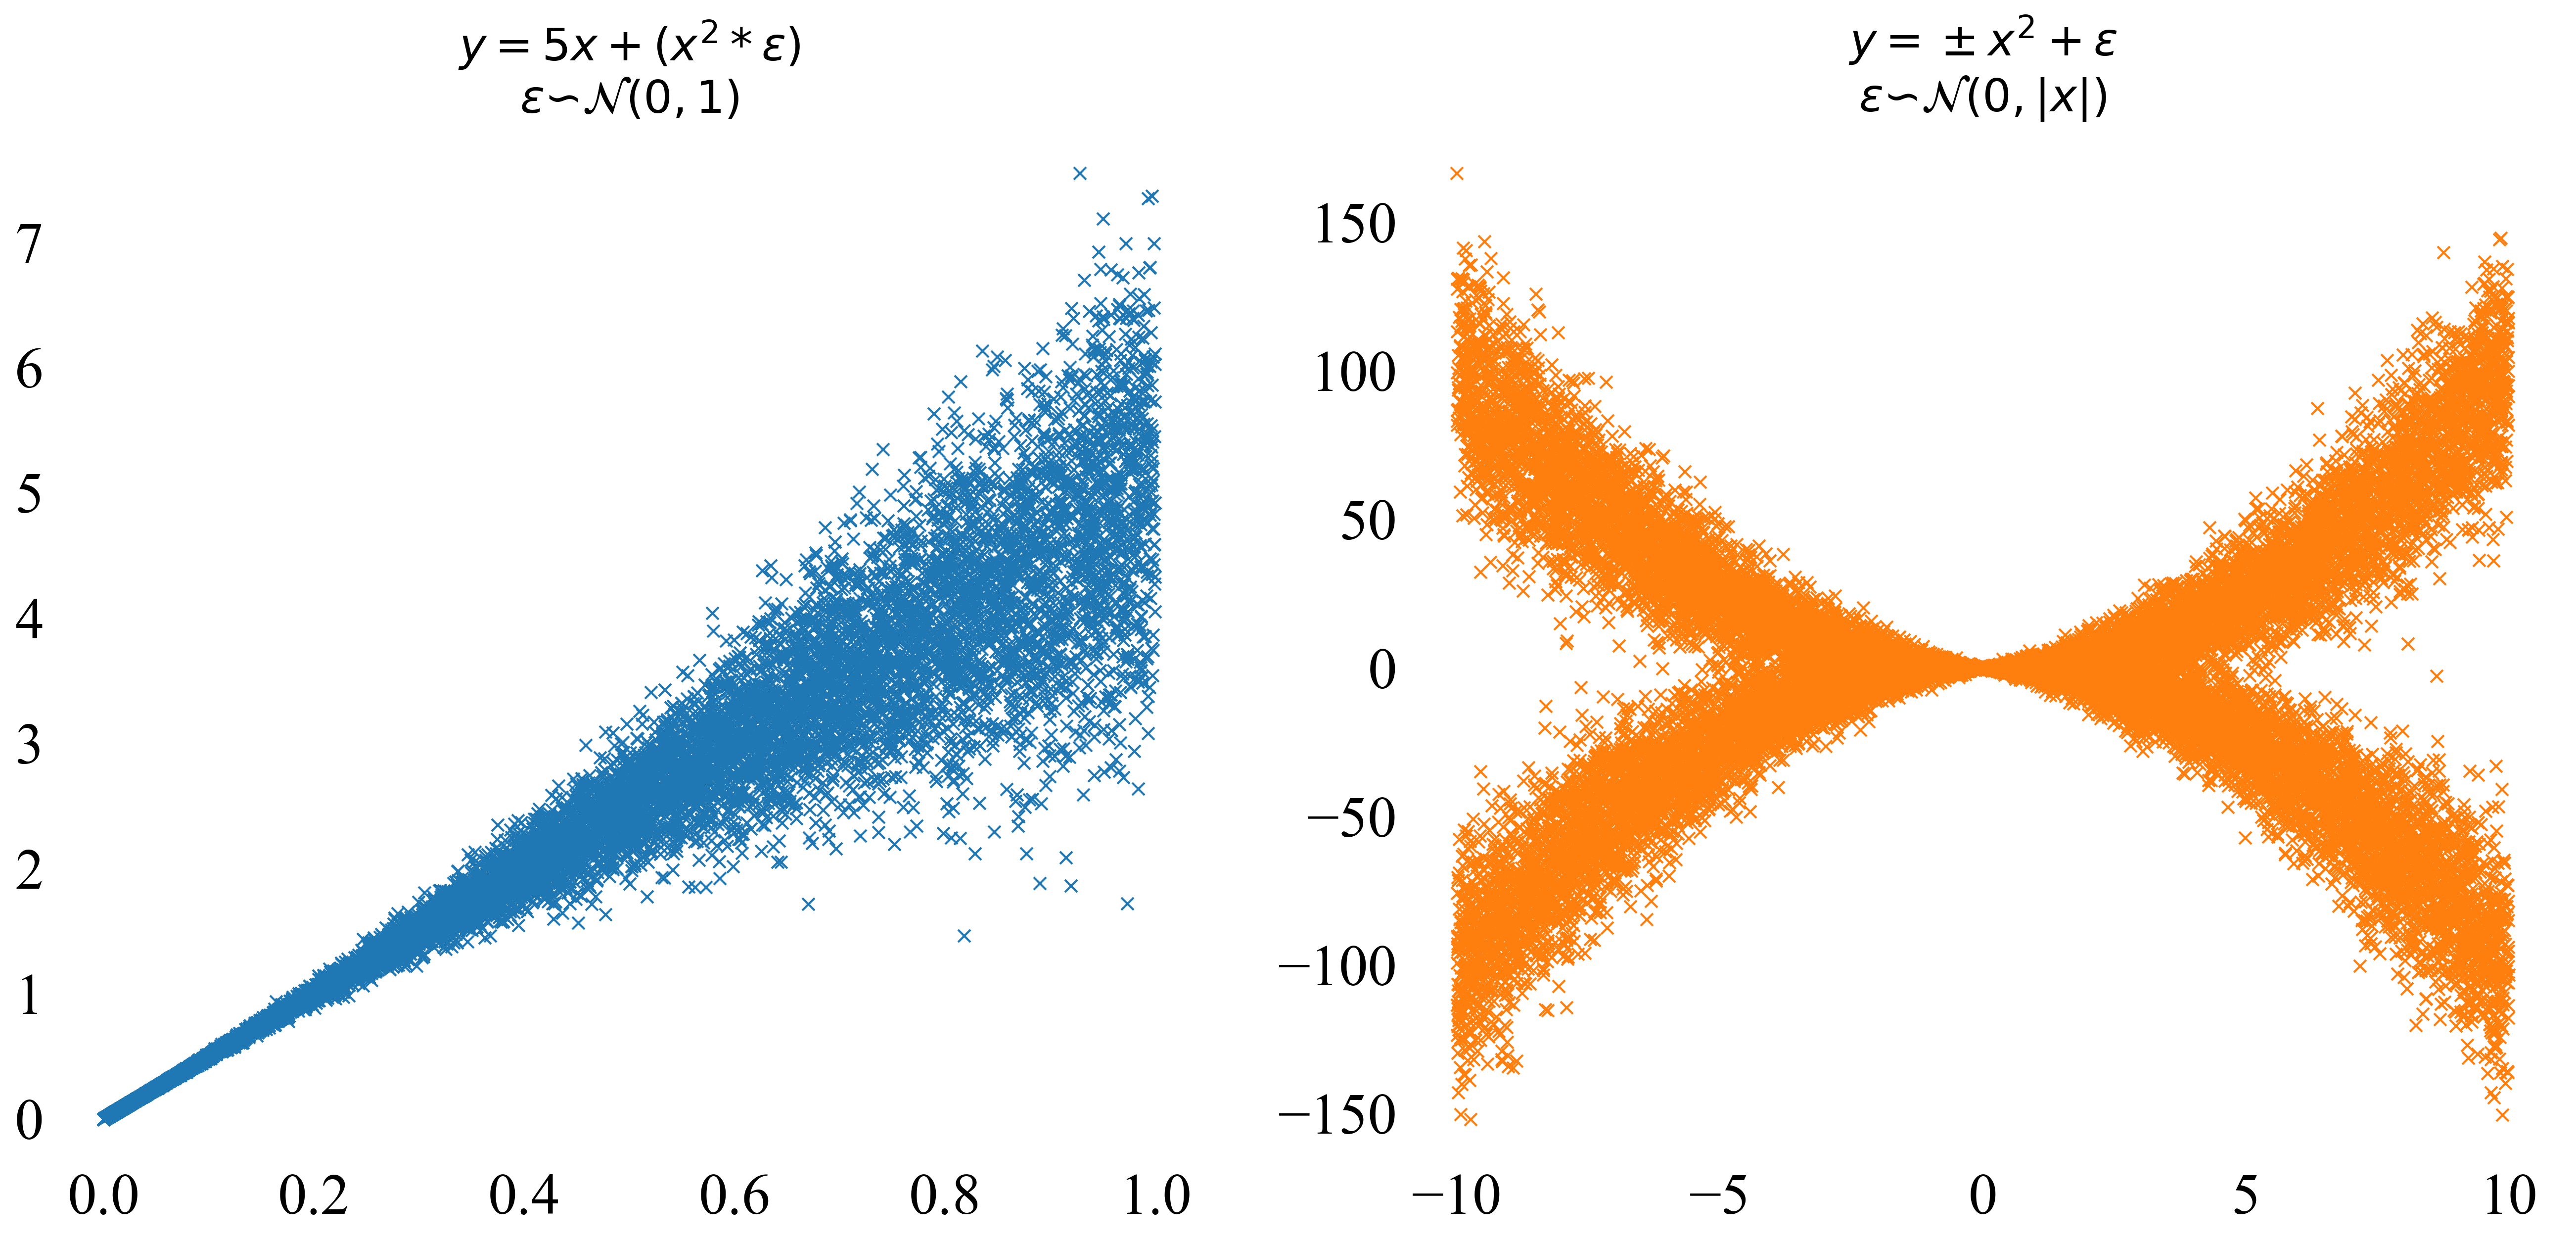

In [11]:
upper=130
lower=-10
samples = int(1e4)

dpi = 300
x_size = int(5600/dpi)
y_size = int(2900/dpi)

f, (ax, ax1) = plt.subplots(1, 2, figsize=(x_size,y_size), dpi=dpi)

x = np.random.sample(samples)
y = np.add(5*x, np.multiply((x)**2, np.random.standard_normal(x.shape)))

ax.set_title(r"$y = 5x + (x^2 * \epsilon)$"+"\n"+r"$\epsilon \backsim \mathcal{N}(0,1)$", fontsize=22)
ax.plot(x,y, "x",alpha=1., color=sns.color_palette()[0])

x_r = np.random.uniform(-10, 10, size=samples)
r_r = np.array([np.random.normal(scale=np.abs(i)) for i in x_r])
y_r = np.square(x_r)+r_r*2.0

x_l = np.random.uniform(-10, 10, size=samples)
r_l = np.array([np.random.normal(scale=np.abs(i)) for i in x_l])
y_l = -np.square(x_l)+r_l*2.0

x = np.concatenate((x_l,x_r), axis=-1)
y = np.concatenate((y_l,y_r), axis=-1)

ax1.set_title(r"$y = \pm x^2 + \epsilon$"+"\n"+r"$\epsilon\backsim\mathcal{N}(0,|x|)$", fontsize=22)
ax1.plot(x,y, "x",alpha=1., color=sns.color_palette()[1])

remove_ax_window(ax)
remove_ax_window(ax1)

plt.tight_layout()

plt.savefig("graphics/violations.png", format='png',dpi=dpi, bbox_inches='tight')

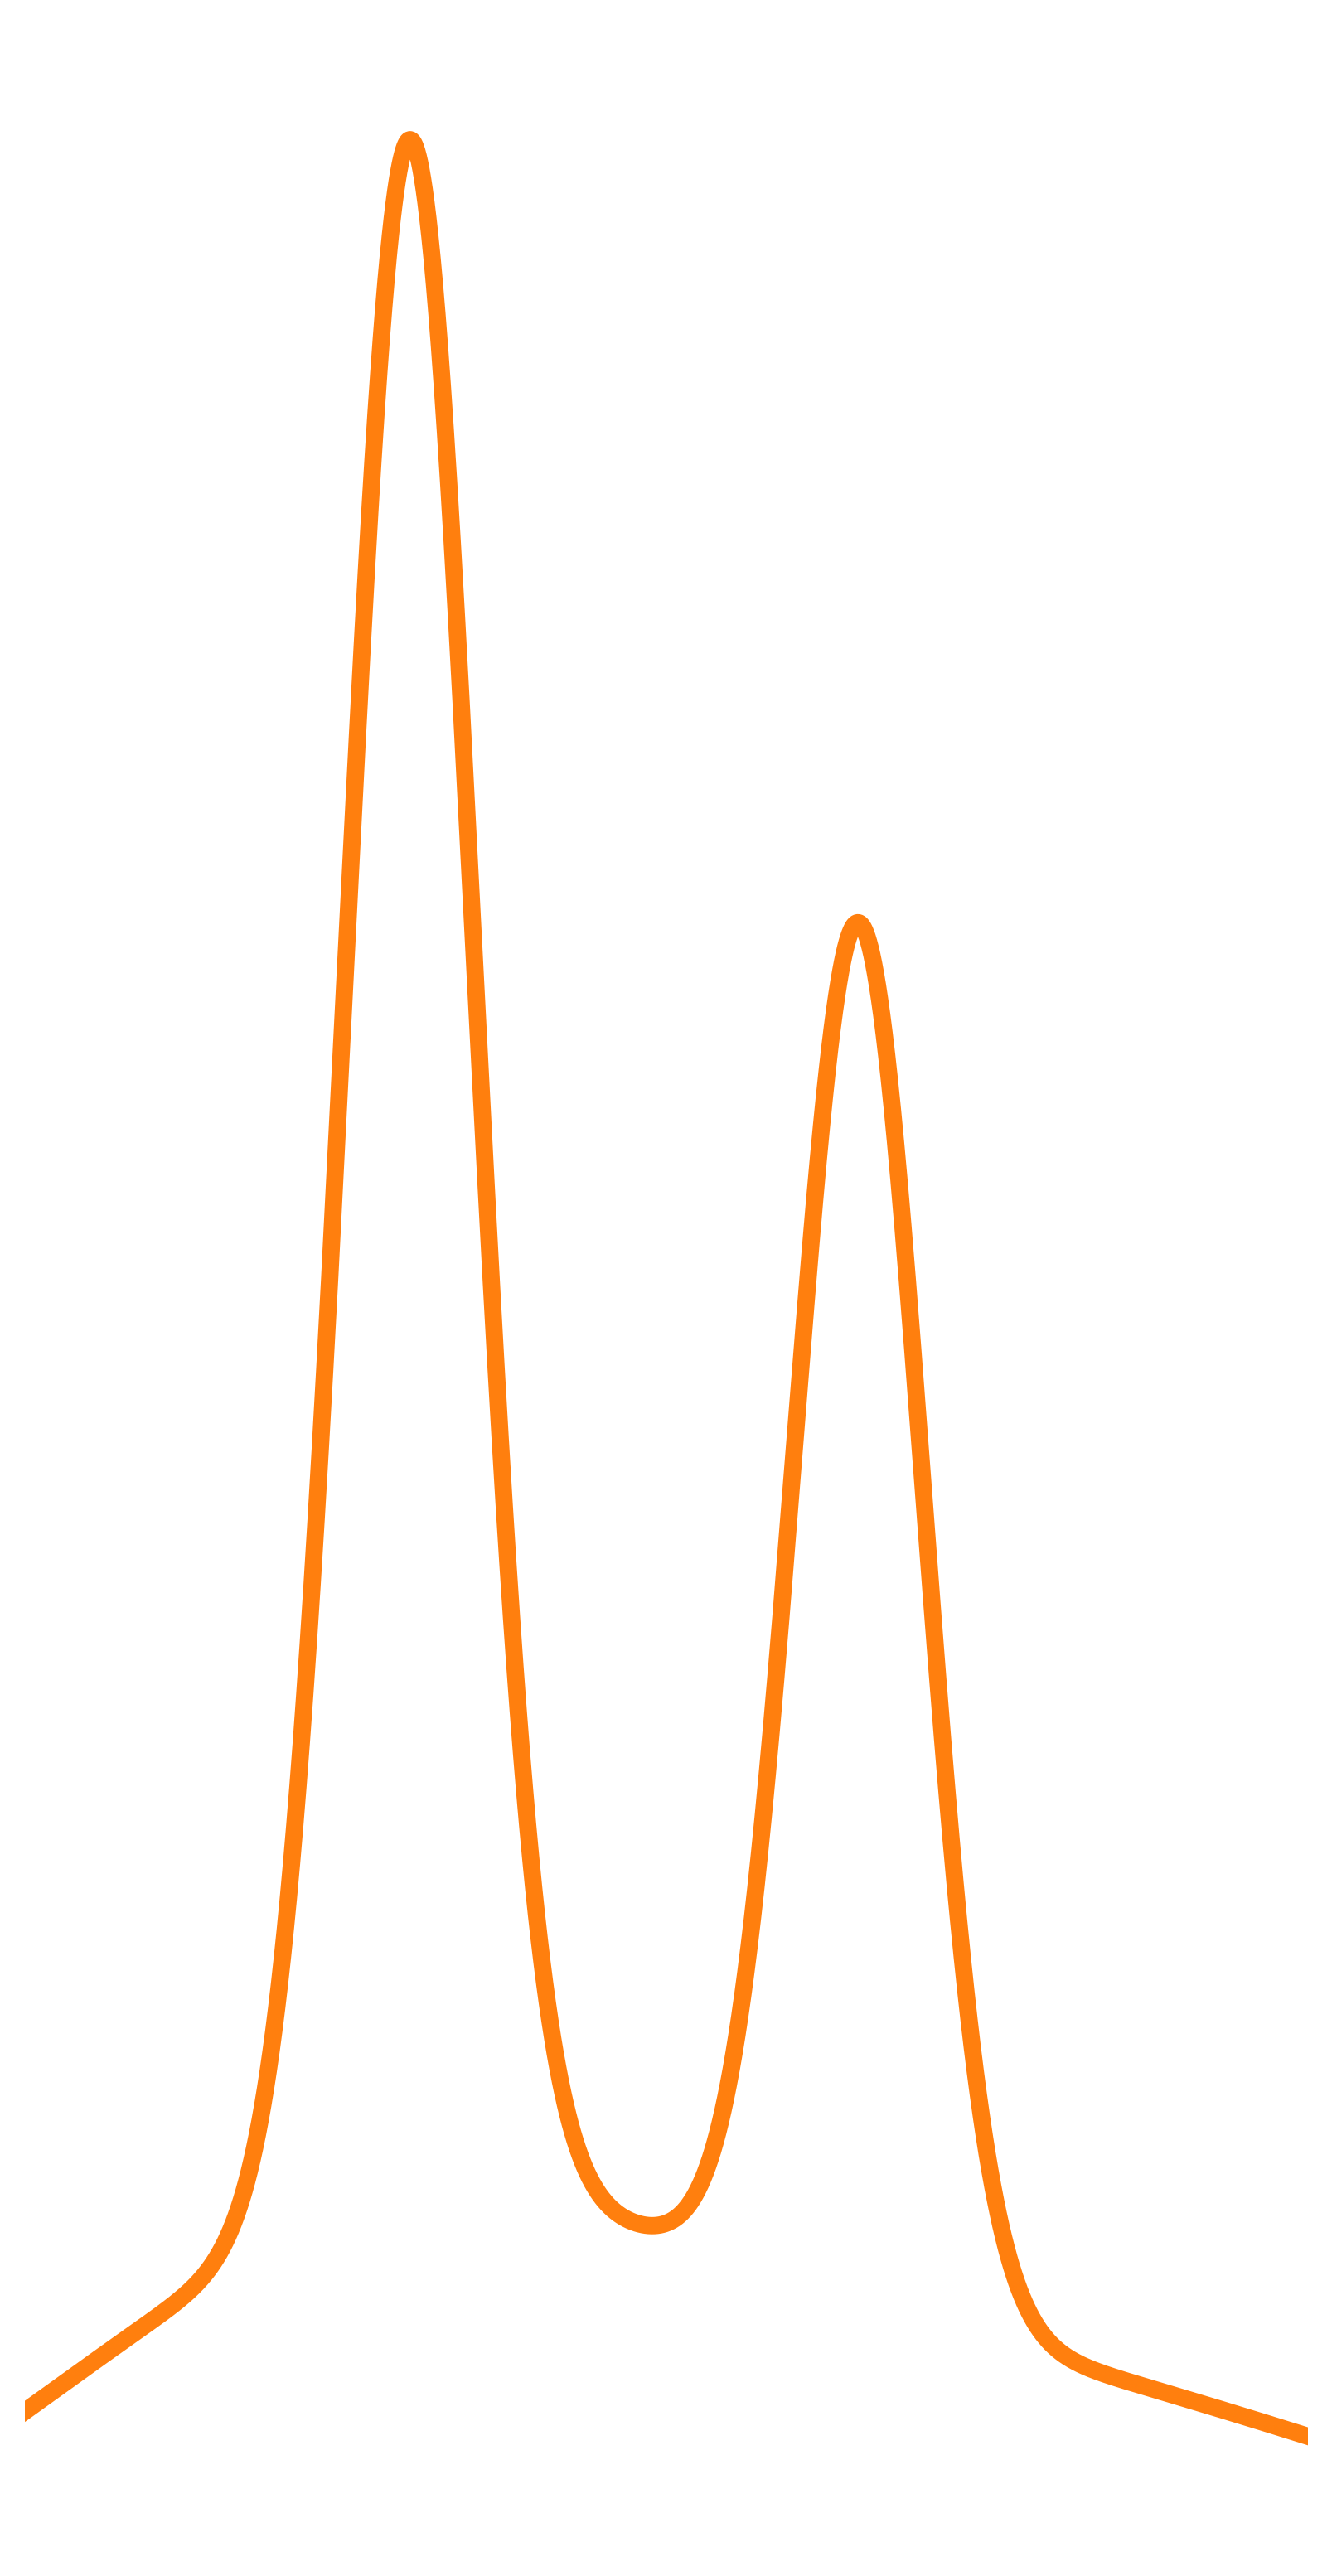

In [12]:
lower=-5
upper=15

dpi = 300
x_size = int(1800/dpi)
y_size = int(3300/dpi)


alphas = [0.2, 0.3, 0.2,.3]
means = [0, 1, 8, 9]
sigmas = [5, 1, 1, 8]

gm = tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(probs=alphas),
    components_distribution=tfd.Normal(
        loc=means,       
        scale=sigmas))

f = plt.figure(figsize=(x_size,y_size), dpi=dpi)
ax = plt.gca()

ax.set_xlim(lower, upper)
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)
remove_ax_window(ax)

x = np.linspace(upper, lower, int(1e4), dtype=np.float32)
ax.plot(x, gm.prob(x).numpy(), lw=5, label="Gaussian Mixture", color=sns.color_palette()[1])

plt.tight_layout()

plt.savefig("graphics/mixt_dist_concept.png", format='png',dpi=dpi, bbox_inches='tight')